Practical 4 : Implementation of Neural Network on IRIS Dataset.

In [1]:
import pandas as pd
import numpy as np
from keras.utils import np_utils

In [2]:
dataset = pd.read_csv('./iris_dataset/iris.csv')
X = dataset.iloc[:, 1:5].values
Y = dataset.iloc[:, 5].values

In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Use to convert your class category (mentioned in Y) in one hot vector
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(Y)
Y = pd.get_dummies(y1).values


# will split the data in training and testing data with 20%, So, after that Train data= 120 and test data=30
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [5]:
print("X_train is:",X_train.shape)
print("Y_train is:",Y_train.shape)
print("X_test is:",X_test.shape)
print("Y_test is:",Y_test.shape)

X_train is: (120, 4)
Y_train is: (120, 3)
X_test is: (30, 4)
Y_test is: (30, 3)


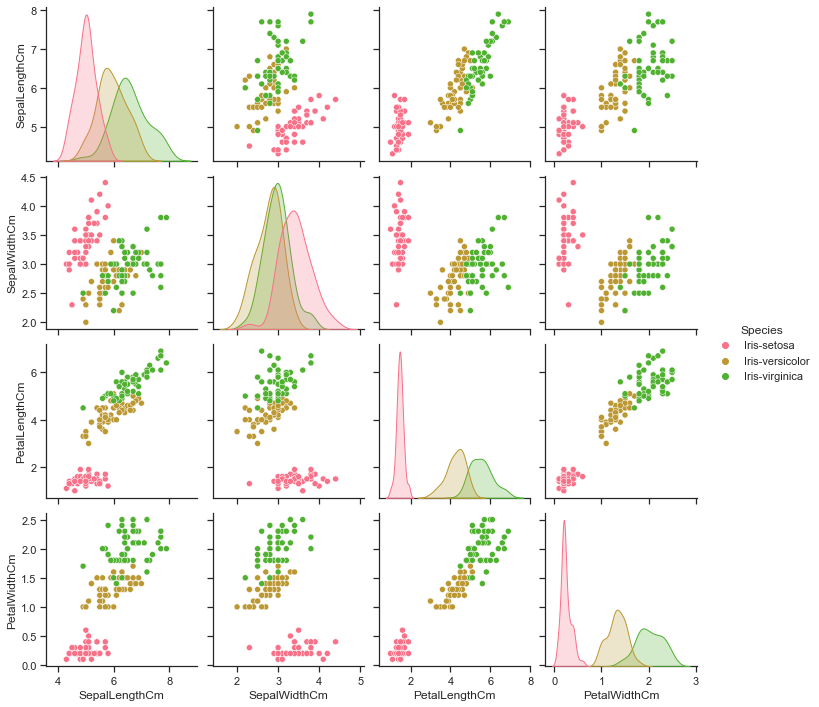

In [6]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,1:6],hue="Species")

## Below is the Network that we want to create

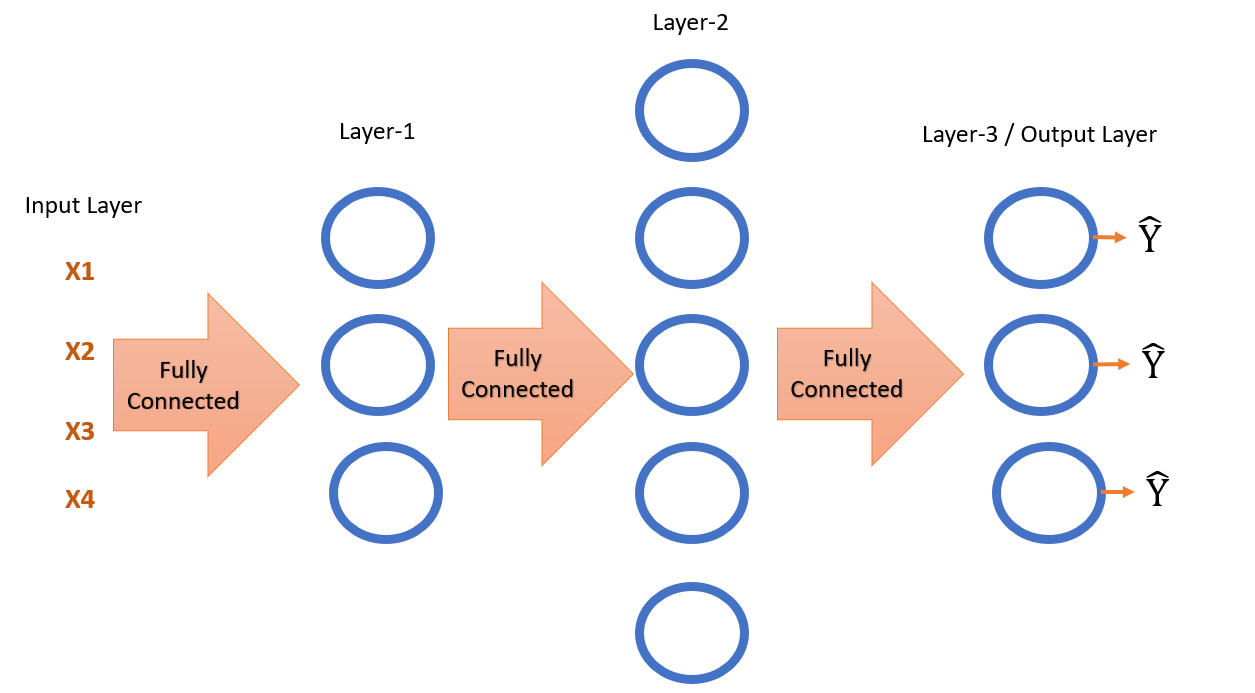

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Check initialized weights
print(model.get_weights())

[array([[ 0.06508589, -0.69787055,  0.52382815],
       [-0.6303696 , -0.2736609 ,  0.10785949],
       [ 0.6326822 , -0.34362853, -0.12820089],
       [-0.87268335,  0.80974054, -0.05718547]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[ 0.3293057 , -0.3207479 ,  0.67038757, -0.6827861 , -0.61786246],
       [-0.8238645 ,  0.58302575, -0.5591028 ,  0.6092654 , -0.13308758],
       [ 0.35576946, -0.08064687, -0.14443243,  0.00235093,  0.05677754]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[-0.19322568,  0.17788488,  0.24400717],
       [ 0.25033277,  0.43727666,  0.5878499 ],
       [ 0.28958088,  0.76538044,  0.7995524 ],
       [ 0.81605643, -0.65388167, -0.4360927 ],
       [-0.28040797, -0.21475029, -0.17969137]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [13]:
# Training a model on Train data and at the end it will updates the weights.
model.fit(X_train, Y_train, epochs=30, batch_size=8)

Epoch 1/30
15/15 [==============================] - 0s 4ms/step - loss: 0.4039 - accuracy: 0.8000
Epoch 2/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8167
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3961 - accuracy: 0.8167
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3921 - accuracy: 0.8583
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3891 - accuracy: 0.8667
Epoch 6/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3897 - accuracy: 0.9083
Epoch 7/30
15/15 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8667
Epoch 8/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3774 - accuracy: 0.8500
Epoch 9/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.8667
Epoch 10/30
15/15 [==============================] - 0s 4ms/step - loss: 0.3699 - accuracy: 0.8833
Epoch 11/30
15/15 [

In [14]:
#Weights after training the data
print(model.get_weights())

[array([[ 0.11943432, -0.69787055,  0.9120364 ],
       [-0.6589078 , -0.2736609 ,  0.49446258],
       [ 1.0493371 , -0.34362853, -0.00288998],
       [-0.20887353,  0.80974054, -0.25526634]], dtype=float32), array([-0.10300164,  0.        ,  0.4764084 ], dtype=float32), array([[ 0.79493886, -0.3207479 ,  1.2328126 , -1.0196309 , -0.6845721 ],
       [-0.8238645 ,  0.58302575, -0.5591028 ,  0.6092654 , -0.13308758],
       [ 0.17339225, -0.08064687, -0.01828858,  0.30656657,  0.4105628 ]],
      dtype=float32), array([-0.20008253,  0.        ,  0.00218433,  0.25181612,  0.41894382],
      dtype=float32), array([[-0.29737145,  0.14754076,  0.2708072 ],
       [ 0.25033277,  0.43727666,  0.5878499 ],
       [-0.30673802,  0.7198968 ,  1.0471046 ],
       [ 1.347645  , -1.1617991 , -0.9658389 ],
       [ 0.22052737,  0.20354165, -1.1227503 ]], dtype=float32), array([ 0.1401958 ,  0.12666322, -0.26915035], dtype=float32)]


In [15]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 448ms/step - loss: 0.3157 - accuracy: 0.9000

Accuracy: 90.00%


In [16]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 231ms/step


In [17]:
X_test[1,:], y_pred[1]

(array([6. , 2.2, 4. , 1. ]),
 array([0.0024249 , 0.52733934, 0.4702358 ], dtype=float32))

In [18]:
y_pred_class = np.argmax(y_pred[1])

In [19]:
print(y_pred_class)

1


In [20]:
#Accuracy of the predicted values
y_pred = model.predict(X_test)

y_test_class = np.argmax(Y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

1/1 [==============================] - 0s 50ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
